## **Задание 1 - Базовая задача МНК**

Теоретический вопрос 1.

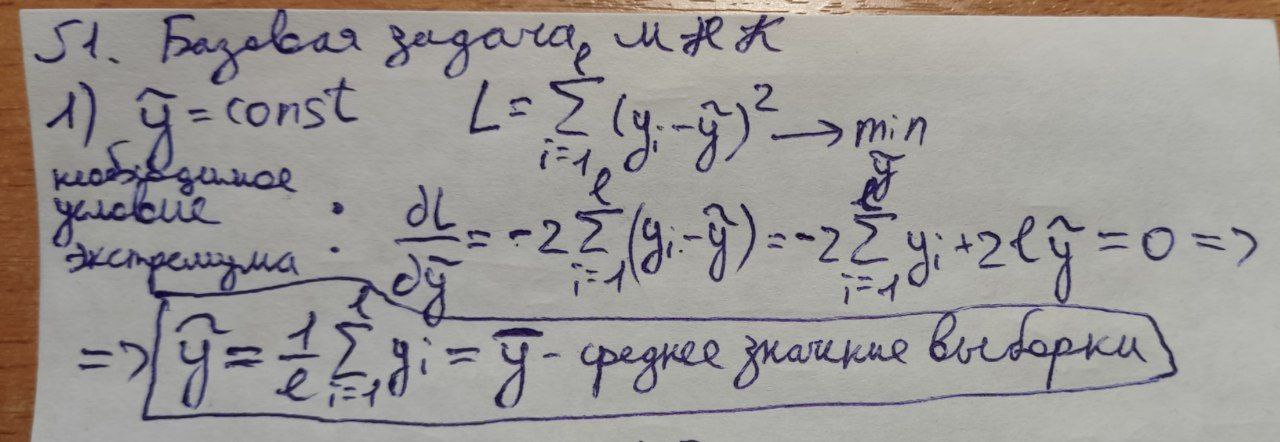

Теоретический вопрос 2.

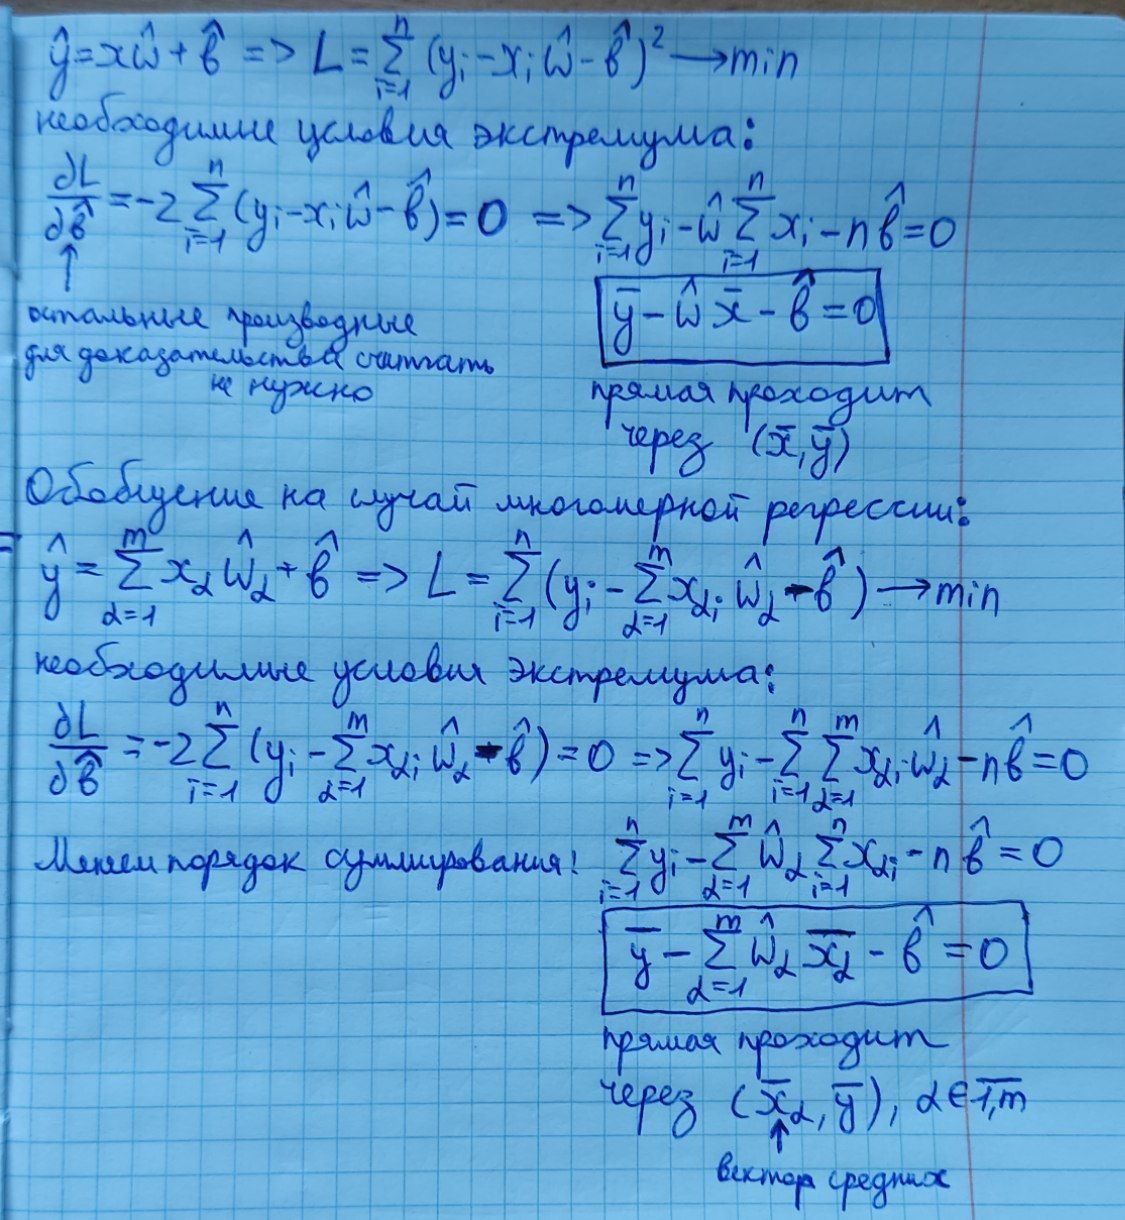

Практическое задание

In [ ]:
import seaborn as sns
import numpy as np

data = sns.load_dataset('anscombe')

stds = data.groupby(["dataset"]).std().rename(columns={"x": "std x", "y": "std y"})

stds

In [ ]:
pearson = data.groupby(["dataset"]).corr(method="pearson")

pearson


In [ ]:
data1 = data.set_index('x')
data.groupby('dataset').plot(legend=True, kind="scatter", x="x", y="y")

## **Задание 2 - Централизация признаков и МНК**

Теоретический вопрос

Практическая проверка

In [4]:
n, m = 7,5 # Важно n>m - переопределённая система

mat = np.random.randint(-5,5, size=(n,m))

mat_0 = mat-mat.mean(axis=0).reshape(1,m)

inv_0 = np.linalg.inv(np.matmul(mat_0.T, mat_0))

In [5]:
mat_1 = np.concatenate((mat, np.ones(shape=(n,1))), axis=1)

inv_1 = np.linalg.inv(np.matmul(mat_1.T, mat_1))[:-1,:-1]

In [ ]:
inv_0, inv_1

In [ ]:
np.allclose(inv_0, inv_1)

## Задание 3 - Геометрический смысл псевдообратной матрицы

## **Задание 4 - Матрица объект-признак**

Теоретический вопрос 1

Практическое задание

In [8]:
N=2000

A = np.random.randint(-5,5, size=(3,3))
A = A.T @ A
X = np.random.multivariate_normal(np.zeros(3), A, size=N)

In [ ]:
A

In [ ]:
X

In [ ]:
S,V,D = np.linalg.svd(X)

D

In [ ]:
import plotly.graph_objects as go

# Функция для рисования 3D графика с цветными сегментами
def plot_colored_spiral(X,D,A):
    

    scat = go.Scatter3d(
            x=X[:, 0],
            y=X[:, 1],
            z=X[:, 2],
            mode='markers',
            showlegend=False,
            marker_line_color="black", 
            marker_color="magenta",
                           
            marker_line_width=20, 
            marker_size=4,
        )
    
    con1 = go.Cone(x=[D[0,0]*max(20,A[0,0])],y=[D[0,1]*max(20,A[0,0])],z=[D[0,2]*max(20,A[0,0])], u=[D[0,0]], v=[D[0,1]], w=[D[0,2]], sizemode="absolute",
    sizeref=10)

    con2 = go.Cone(x=[D[1,0]*max(20,A[1,1])],y=[D[1,1]*max(20,A[1,1])],z=[D[1,2]*max(20,A[1,1])], u=[D[1,0]], v=[D[1,1]], w=[D[1,2]], sizemode="absolute",
    sizeref=10)

    con3 = go.Cone(x=[D[2,0]*max(20,A[2,2])],y=[D[2,1]*max(20,A[2,2])],z=[D[2,2]*max(20,A[2,2])],  u=[D[2,0]], v=[D[2,1]], w=[D[2,2]], sizemode="absolute",
    sizeref=10)
    
    fig = go.Figure(data = [scat, con1, con2, con3])
    fig.update_layout(scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ))

    fig.update_layout(scene_camera=dict(eye=dict(x=-1.25, y=-1.25, z=1.25),
                                        center=dict(x=0, y=0, z=0),
                                        up=dict(x=0, y=0, z=1),
                                        projection=dict(type='perspective')),
                      scene=dict(aspectmode='cube'))

    # Установка размеров канваса
    fig.update_layout(width=600, height=600)

    fig.show(width=600, height=600)  # Размещение по центру

# Создание интерактивных виджетов
plot_colored_spiral(X, D, A)  # Начальное значение

Перейдём в СК с базисными сингулярными векторами, сохранив при этом размеры облака (то есть сделаем поворот в трёхмерном пространстве)

In [ ]:
Sinv = np.linalg.inv(D.T)

X_1 = (Sinv @ X.T).T


plot_colored_spiral(X_1, np.eye(3,3), A)

Теперь проще проецировать все точки сразу

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_1[:, 0], y=X_1[:, 1])
plt.title("Проекция на плоскость первого вектора")

plt.show()

In [ ]:
sns.scatterplot(x=X_1[:, 1], y=X_1[:, 2])

plt.title("Проекция на плоскость второго вектора")

plt.show()

In [ ]:
sns.scatterplot(x=X_1[:, 0], y=X_1[:, 2])

plt.title("Проекция на плоскость третьего вектора")

plt.show()

## **Задание 5 - Геометрический смысл сингулярного разложения**

Практическое задание

In [17]:
import numpy as np

def tsvd(A, b, eps=1e-8):

    U, S, Vt = np.linalg.svd(A)
    r = np.sum(S > eps)
    
    U_tsvd = U[:, :r]
    S_tsvd = S[:r]
    Vt_tsvd = Vt[:r]

    Sinv = np.diag(1/S_tsvd)

    x_tsvd = Vt_tsvd[:r, :].T @ Sinv @ U_tsvd[:, :r].T @ b

    U_add = U[:, r:]
    Vt_add = Vt[r:]

    C2 = U_add.T @ A @ Vt_add.T
    b2 = U_add.T @ b

    z2 = np.linalg.solve(C2, b2)
    x = x_tsvd + Vt_add.T @ z2


    res = np.linalg.norm(A @ x - b)
    return x, res

In [ ]:
from scipy.linalg import hilbert
n = 8
H = hilbert(n)
b = np.array([1] + [0]*(n-1))


x_standart = np.linalg.solve(H, b)
res_standart = np.linalg.norm(H @ x_standart - b)

x_tsvd, res_tsvd = tsvd(H, b)

print(f"n = {n}\n")
print(f"Стандартное решение:\n {x_standart}")
print(f"Невязка: {res_standart}\n")
print(f"TSVD решение:\n {x_tsvd}")
print(f"Невязка: {res_tsvd}")

TSVD решение на порядок менее точное

In [ ]:
n = 10
H = hilbert(n)
b = np.array([1] + [0]*(n-1))

x_standart = np.linalg.solve(H, b)
res_standart = np.linalg.norm(H @ x_standart - b)

x_tsvd, res_tsvd = tsvd(H, b)

print(f"n = {n}\n")
print(f"Стандартное решение:\n {x_standart}")
print(f"Невязка: {res_standart}\n")
print(f"TSVD решение:\n {x_tsvd}")
print(f"Невязка: {res_tsvd}")

TSVD решение даже немного точнее стандартного

## **Задание 6 - Преобразование Прокруста**

In [20]:
import pandas as pd

data = pd.read_csv("signatureData.csv")

fig1=data[["x1", "x2"]]
fig2=data[["y1", "y2"]]

def procrustes(X1, X2):
    mean1 = np.array(X1.mean(axis=0)).reshape(2,1)
    mean2 = np.array(X2.mean(axis=0)).reshape(2,1)

    one = np.ones(shape=(X1.shape[0],1))

    fig1c = X1 - one @ mean1.T
    fig2c = X2 - one @ mean2.T

    U,D,Vt = np.linalg.svd(fig1c.T @ fig2c)

    R = U @ Vt

    mu = mean2 - R.T @ mean1

    fig1_new = X1 @ R + one @ mu.reshape(2,1).T

    return fig1_new

In [21]:
fig1_new = procrustes(fig1, fig2)

In [ ]:
mean1 = np.array(fig1.mean(axis=0)).reshape(2,1)
mean2 = np.array(fig2.mean(axis=0)).reshape(2,1)

mean1, mean2

In [ ]:
plt.scatter(x = fig1_new[0], y = fig1_new[1], label = "transformed object 1")
plt.scatter(x = fig2["y1"], y = fig2["y2"], label = "object 2 (goal)")
plt.scatter(x = fig1["x1"], y = fig1["x2"], label = "object 1")

plt.legend()

In [24]:
def rotation():
    cos = np.random.rand()
    sin = (np.random.choice([-1,1],1))[0]*np.sqrt(1-cos**2)

    return np.array([[cos, sin],[-sin, cos]])

In [25]:
s2 = np.array([[4,4],[4,8],[8,8],[8,4],[4,6],[8,6],[6,4], [6,8], [6,6]])
s1 = (s2 + np.random.random(size=s2.shape)) @ rotation() + np.ones(shape=(s2.shape[0],1)) @ np.random.randint(-20,20, size=(2,1)).T

In [26]:
s1_new = procrustes(s1,s2)

In [ ]:
plt.scatter(s1_new[:,0], s1_new[:,1], label = "transformed object 1")
plt.scatter(s2[:,0], s2[:,1], label = "object 2 (goal)")
plt.scatter(s1[:,0], s1[:,1], label = "object 1")

plt.title("Незначительно отличающиеся фигуры")

plt.legend()

Замечание: возможные искажения фигур на графиках (сжатия, растяжения) связаны исключительно с визуализацией (масштабирование осей). Реально фигуры только двигаются и вращаются согласно формулам.

In [28]:
s2 = np.array([[4,4],[4,8],[8,8],[8,4],[4,6],[8,6],[6,4], [6,8], [6,6]])

rot = rotation()

s1 = (s2) @ rot.T + np.ones(shape=(s2.shape[0],1)) @ np.random.randint(-20,20, size=(2,1)).T

In [29]:
s1_new = procrustes(s1,s2)

In [ ]:
plt.scatter(s1_new[:,0], s1_new[:,1], label = "transformed object 1")
plt.scatter(s2[:,0], s2[:,1], label = "object 2 (goal)", s=8)
plt.scatter(s1[:,0], s1[:,1], label = "object 1")

plt.title("Одинаковые фигуры")
plt.legend()

In [31]:
s2 = np.array([[4,4],[4,8],[8,8],[8,4],[4,6],[8,6],[6,4], [6,8], [6,6]])

s1 = np.array([[0,0],[5,6],[4,-5],[1,2],[2,7],[3,1],[5,5],[10,8],[0,3]]) + np.ones(shape=(s2.shape[0],1)) @ np.random.randint(-20,20, size=(2,1)).T

In [32]:
s1_new = procrustes(s1,s2)

In [ ]:
plt.scatter(s1_new[:,0], s1_new[:,1], label = "transformed object 1")
plt.scatter(s2[:,0], s2[:,1], label = "object 2 (goal)")
plt.scatter(s1[:,0], s1[:,1], label = "object 1")

plt.title("Разные фигуры")
plt.legend()

Доказательство формул